### Draw plots for 'Newtons 4th law'

Blog post here: https://jasmcole.com/2018/11/18/newtons-4th-law/

Imports and parameters

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib import rc
%config InlineBackend.figure_format = 'retina'
rc('savefig', dpi = 300)
rc('figure', dpi = 100)


def format_plot(xlabel, ylabel, title, width=5, height=4, grid='on'):
    f = plt.gcf()
    f.set_size_inches(width,height)
    ax = plt.gca()
    sns.despine(offset=10)
    plt.grid(grid)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title, loc='left', fontweight='bold')
    
    leg = ax.get_legend()
    if leg is not None:
        leg.get_frame().set_linewidth(0.0)
        leg.get_frame().set_alpha(1)

    plt.tight_layout()

l = 3
T1 = 3
T2 = 1
gamma = 0.01
t0 = 4*l**2/(gamma * np.pi**2)
Nx = 2001
Nt = 10
N_components = 1000
x = np.linspace(-l, l, Nx)
ts = np.linspace(0.001 * t0, 1.5 * t0, Nt)
T_initial = np.ones_like(x)
T_initial[x <= 0] = T1
T_initial[x > 0] = T2

def solution_component(n, t):
    return -1 * \
            1/(2*n-1) * \
            (T1 - T2)/2 * \
            4/np.pi * \
            np.exp(-gamma * t * ( (2*n-1)/2 * np.pi/l )**2) * \
            np.sin( (2*n-1)/2 * np.pi * x / l)

Calculate evolution of temperature profile with time

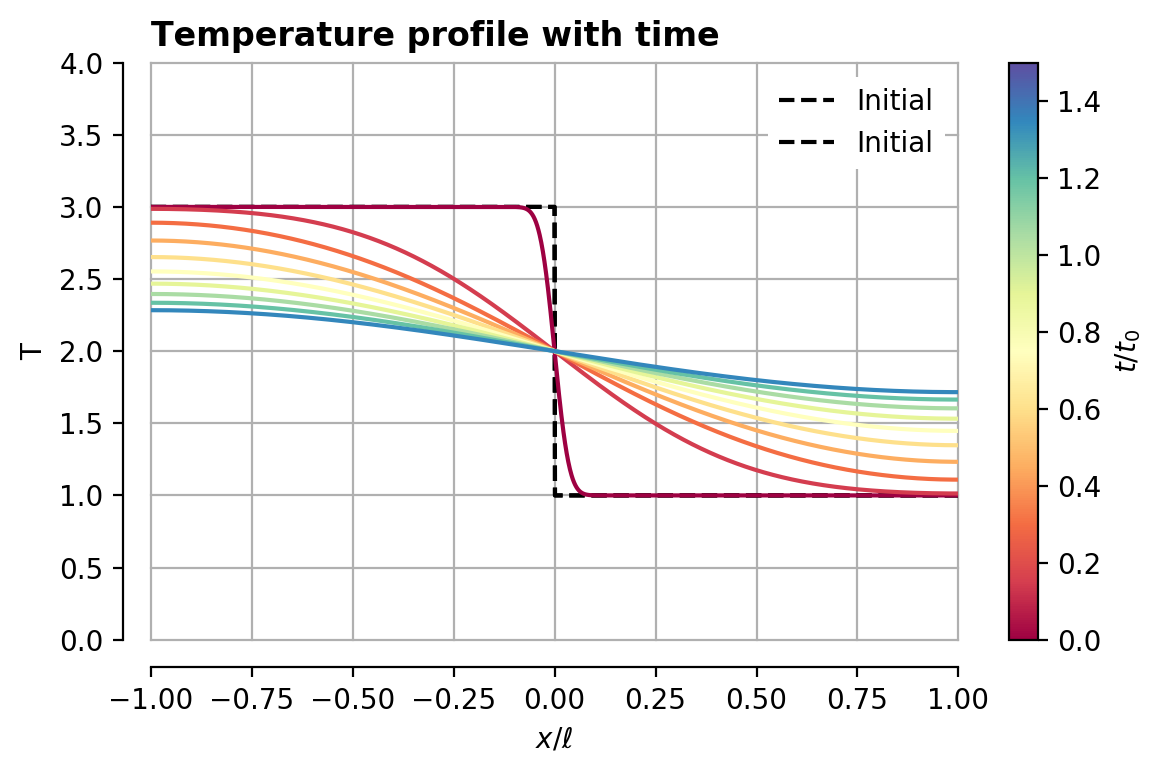

In [3]:
plt.plot(x/l, T_initial, c='black', linestyle='--', label='Initial')

T_av_LHS = []
for i, t in enumerate(ts):
    T_summed = 0.5 * (T1 + T2) * np.ones_like(x)
    for n in range(1,N_components):
        T_summed += solution_component(n, t)
    T_av_LHS.append(np.trapz(T_summed[:int(Nx/2)], x[:int(Nx/2)]) / l)
    plt.plot(x/l, T_summed, c=plt.cm.Spectral(i/len(ts)))

# Dummy for colorbar
plt.pcolor(np.array([[0,1]]), cmap="Spectral").set_visible(False)
plt.xlim([-1, 1])
plt.ylim([0, 4])
plt.legend()

format_plot(xlabel='$x/\ell$', ylabel='T', title='Temperature profile with time', width=6)

cb = plt.colorbar()
cb.ax.set_ylabel('$t/t_0$')
plt.clim([0, ts[-1]/t0])

plt.tight_layout()
# plt.savefig('solution.png')
plt.show()

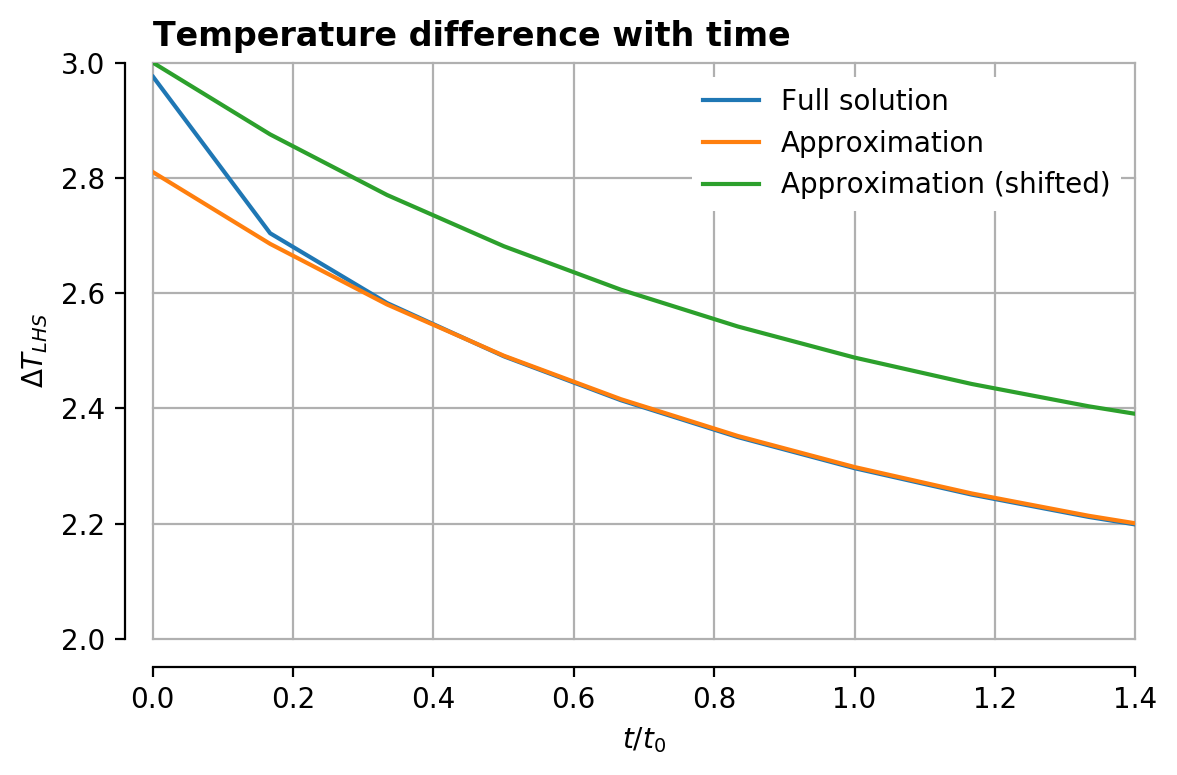

In [4]:
T_1_LHS = np.ones_like(T_av_LHS) * 0.5 * (T1 + T2) + 4*(T1 - T2)/(np.pi**2) * np.exp(- gamma * ( 0.5 * np.pi / l)**2 * ts)

plt.plot(ts/t0, T_av_LHS, label='Full solution')
plt.plot(ts/t0, T_1_LHS, label='Approximation')
plt.plot(ts/t0, T_1_LHS+0.19, label='Approximation (shifted)')

plt.xlim([0, 1.4])
plt.ylim([2, 3])
plt.legend()

format_plot(xlabel='$t/t_0$', ylabel='$\Delta T_{LHS}$', title='Temperature difference with time', width=6)

# plt.savefig('delta_t.png')
plt.show()

Draw initial conditions with annotations

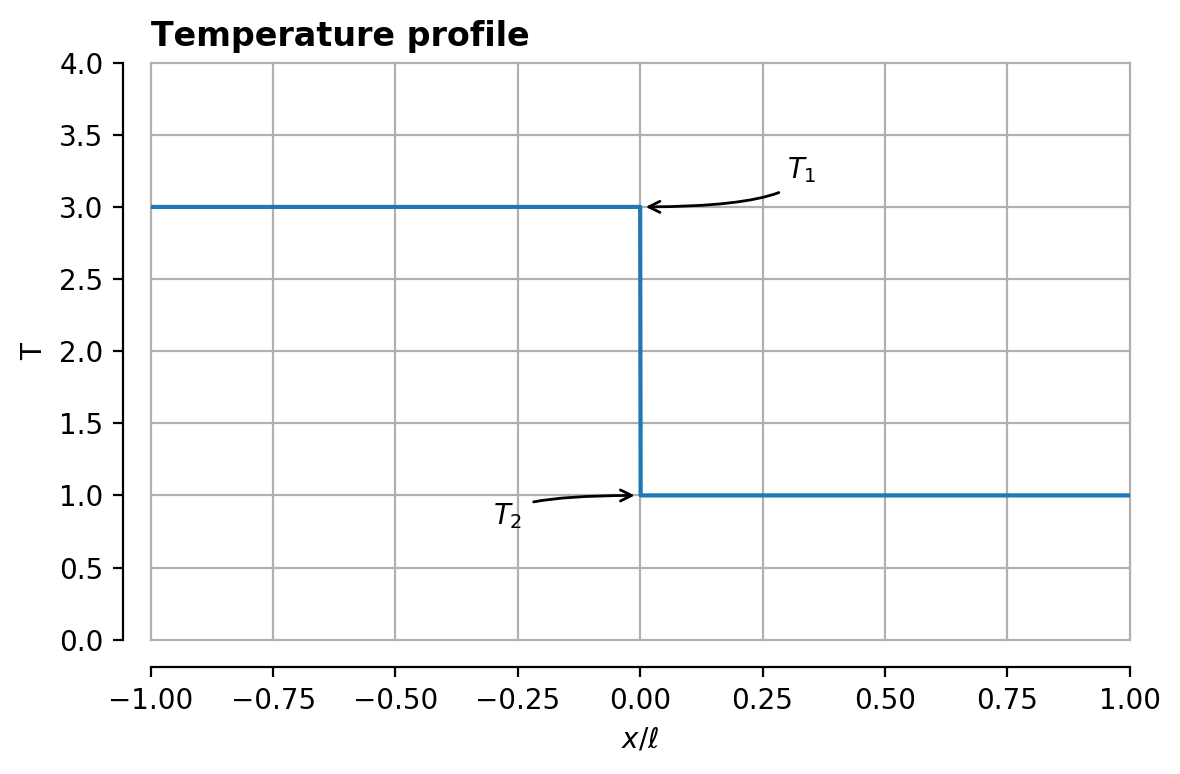

In [5]:
plt.plot(x/l, T_initial, label='Initial')
plt.xlim([-1, 1])
plt.ylim([0, 4])
plt.annotate('$T_1$', xy=(0, 3), xytext=(0.3, 3.2),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle3")
            )
plt.annotate('$T_2$', xy=(0, 1), xytext=(-0.3, 0.8),
            arrowprops=dict(arrowstyle="->", connectionstyle="angle3")
            )

format_plot(xlabel='$x/\ell$', ylabel='T', title='Temperature profile', width=6)

plt.tight_layout()
# plt.savefig('initial.png')
plt.show()